#Datatypes and Bayesian Nonparametric Models

---

To understand data, we often categorize data as falling under a specific type of datatype.  Understanding our underlying dataype gives structure to the problem of modeling the data.

Datamicroscopes provides tools to understand 4 particular datatypes:

1. Real valued data
2. Social network data
3. Timeseries data
4. Text data

In [80]:
import numpy as np
import pandas as pd
import itertools as it
import seaborn as sns
import scipy.io
import cPickle as pickle
%matplotlib inline
import pylab as plt
sns.set_style('darkgrid')
sns.set_context('talk')

The two most common datatypes are real valued data and discrete data

For example, let's take the iris dataset

In [26]:
iris = sns.load_dataset('iris')
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In this case, `species` is a discrete variable and the other variables are real valued

By understanding the form of the data, we can find a model that represents its underlying structure

In the case of the `iris` dataset, plotting the data shows that indiviudal species exhibit a typical range of measurements

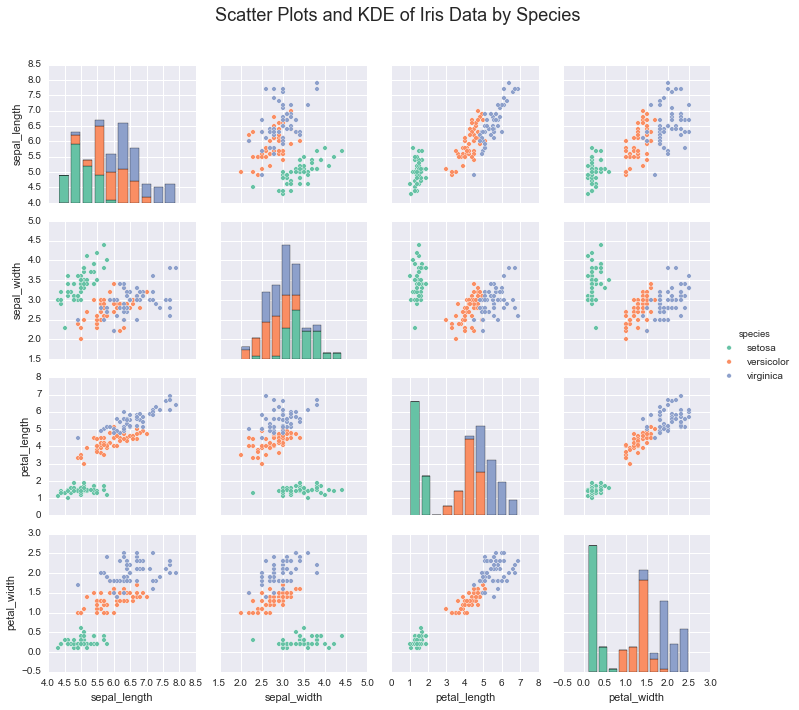

In [31]:
irisplot = sns.pairplot(iris, hue="species", palette='Set2', diag_kind="hist", size=2.5)
irisplot.fig.suptitle('Scatter Plots and KDE of Iris Data by Species', fontsize = 18)
irisplot.fig.subplots_adjust(top=.9)

If we wanted to learn these underlying species' measurements, we would use these real valued measurements and make assumptions about the structure of the data. 

For example we could assume that each species had a latent range of mesurements, and assume that these measurements were distributed multivariate normal. In other words, the conditional probability of the measurements given the species would be normally distributed

$$P(\mathbf{x}|species=s)\sim\mathcal{N}(\mu_{s},\Sigma_{s})$$

Bayesian Models allow us to leverage those assumptions. 

In the case of the iris dataset, we would be able to learn both the latent measurements of each Gaussian AND the number of species with a Dirichlet Process Mixture Model, `microscopes.mituremodel`

Relational Data

While Dirichlet Process Mixture Models are the most common Bayesian Nonparametric Model, there are other kinds of data to consider.  For example, let's consider relational data in social networks

While social network data also has discrete valued varaibles, in this case they have a different interpretation than the iris dataset

Let's look at the Enron Email Corpus

In [38]:
import enron_utils


with open('results.p') as fp:
    communications = pickle.load(fp)
def allnames(o):
    for k, v in o:
        yield [k] + list(v)
names = set(it.chain.from_iterable(allnames(communications)))
names = sorted(list(names))
namemap = { name : idx for idx, name in enumerate(names) }
N = len(names)

communications_relation = np.zeros((N, N), dtype=np.bool)
for sender, receivers in communications:
    sender_id = namemap[sender]
    for receiver in receivers:
        receiver_id = namemap[receiver]
        communications_relation[sender_id, receiver_id] = True

print "%d names in the corpus" % N

115 names in the corpus


In this dataset, data is representated as a binary communication matrix where

$$\mathbf{X}_{i,j} = 1 \Leftrightarrow \text{person}_{i} \text{ sent an email to person}_{j}$$

Let's visualize the communication matrix

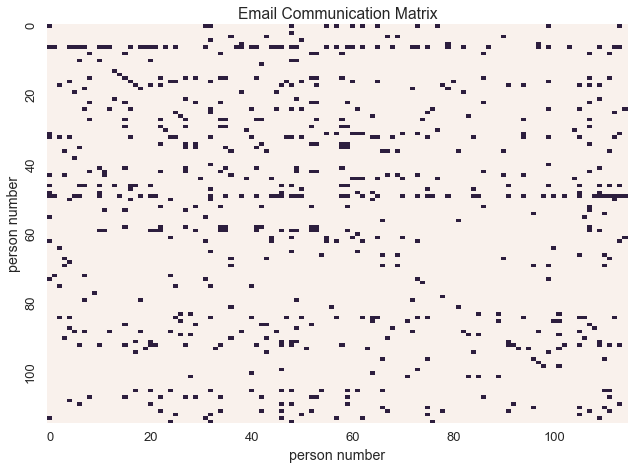

In [43]:
labels = [i if i%20 == 0 else '' for i in xrange(N)]
sns.heatmap(communications_relation, linewidths=0, cbar=False, xticklabels=labels, yticklabels=labels) 
plt.xlabel('person number')
plt.ylabel('person number')
plt.title('Email Communication Matrix')

In this context, binary data represents communication between individuals.  With this interpretation of the data, we can model the underlying social network.  

To learn its structure we could use the Inifinite Relational Model, `microscopes.irm`

In the case of time series data, the index of the data describes the relationship between the observation and the rest of the data 

$$\mathbf{x}_{t}\text{ s.t. }t \in \{0,...,T\}$$

For example, let's look at the Old Faithful Data

In [67]:
old_faithful = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/datasets/faithful.csv', index_col=0)
old_faithful.head()

eruptions  waiting
1      3.600       79
2      1.800       54
3      3.333       74
4      2.283       62
5      4.533       85

Let's plot the erruptions as a function of time

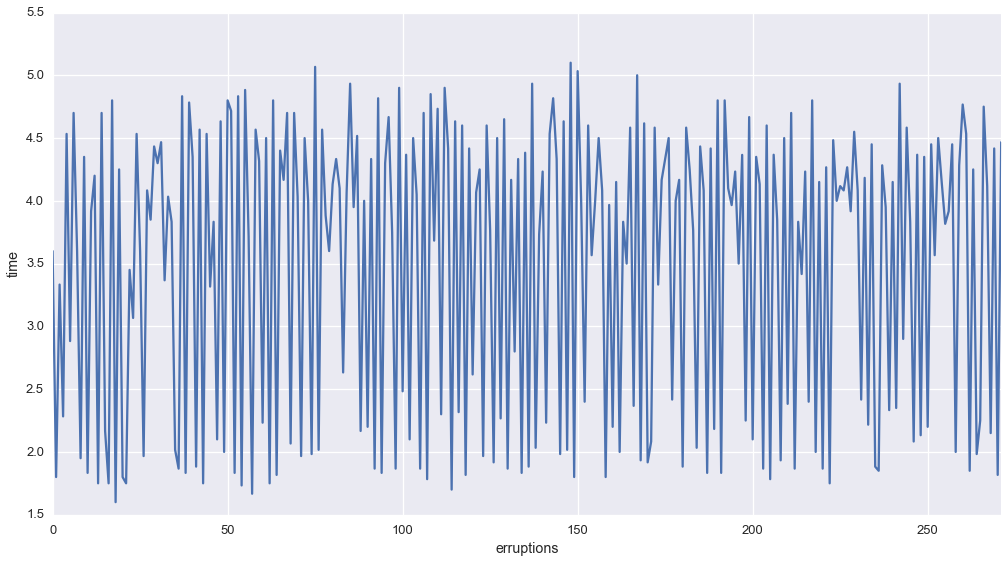

In [79]:
f, ax = plt.subplots(figsize=(17, 9))
sns.tsplot(old_faithful['eruptions'], ax=ax)
plt.xlabel('erruptions')
plt.ylabel('time')

The plot sugests that the number of errupitons has a particular set of states

To learn both the number of underlying states and the states themselves, we could use a Dirichlet-Process Hidden Markov Model

Finally, let's consider text data

Text data, like social network data, is discrete valued.  However, the values are each word or its id.

In [100]:
with open('nyt_50.txt', 'r') as f:
    nyt = f.read()
nyt = nyt.split('\n')

In the case of the New York Times Dataset, we have 50 documents

In [106]:
print nyt[0][:100]
print nyt[1][:100]

the new york times said editorial for tuesday jan new year day has way stealing down upon coming the
the seminal russian filmmaker sergei eisenstein had physically matched the style his monumental film


One of the most common classification tasks within corpora is topic modelling

While LDA is a popular method of topic modeling, we can also learn topics and the number of topics with the Heierarchical Dirichlet Process

---

These example illustrate the ways in which Bayesian Nonparametric Models can learn structure within data.  For more information about each model within Datamicroscopes you can read about each of the models in detail.
